<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/Weights_heights_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [45]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# 2. Load the Data
df = pd.read_csv('/content/weights_heights.csv')

In [48]:
# 3. Inspect the Data
print(df.head())

   Index    Height    Weight
0      1  65.78331  112.9925
1      2  71.51521  136.4873
2      3  69.39874  153.0269
3      4  68.21660  142.3354
4      5  67.78781  144.2971


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   25000 non-null  int64  
 1   Height  25000 non-null  float64
 2   Weight  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB
None


In [50]:
print(df.describe())

              Index        Height        Weight
count  25000.000000  25000.000000  25000.000000
mean   12500.500000     67.993114    127.079421
std     7217.022701      1.901679     11.660898
min        1.000000     60.278360     78.014760
25%     6250.750000     66.704397    119.308675
50%    12500.500000     67.995700    127.157750
75%    18750.250000     69.272958    134.892850
max    25000.000000     75.152800    170.924000


In [51]:
# 4. Check for Missing Values
print(df.isnull().sum())

Index     0
Height    0
Weight    0
dtype: int64


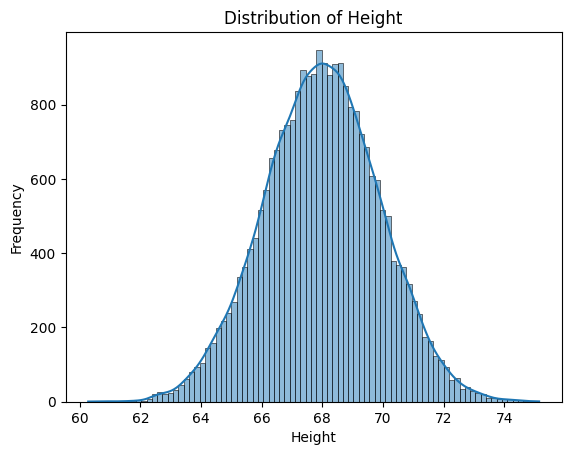

In [52]:
# 5. Visualize the Data (Histogram for Height and Weight)
sns.histplot(df['Height'], kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

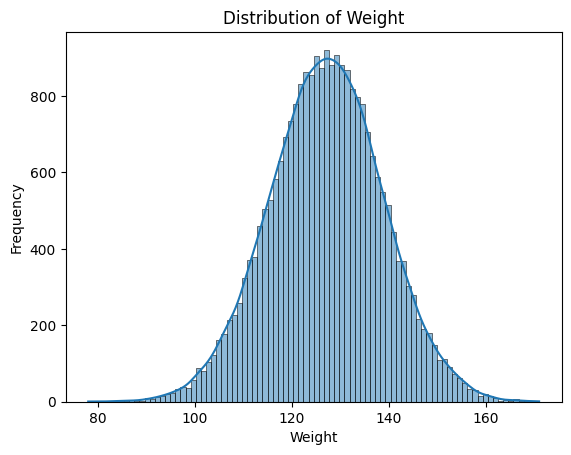

In [53]:
sns.histplot(df['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

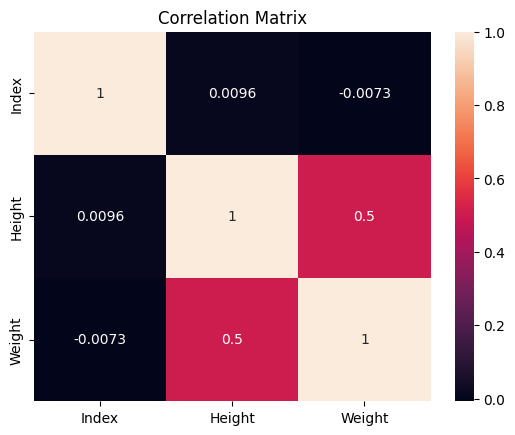

In [54]:
# 6. Check Correlations (Correlation matrix)
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [55]:
# 7. Outlier Detection (Using IQR)
Q1 = df.quantile(0.25)

In [56]:
Q3 = df.quantile(0.75)

In [57]:
IQR = Q3 - Q1

In [58]:
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [59]:
# 8. Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_outliers_removed), columns=df_outliers_removed.columns)

In [63]:
# Save the final preprocessed dataset
df_scaled.to_csv('preprocessed_data.csv', index=False)

# DATA VISUALIZATION AND SIMPLE LINEAR REGRESSION

In [64]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
# Load the data
df = pd.read_csv('/content/weights_heights.csv')

Text(0, 0.5, 'Frequency')

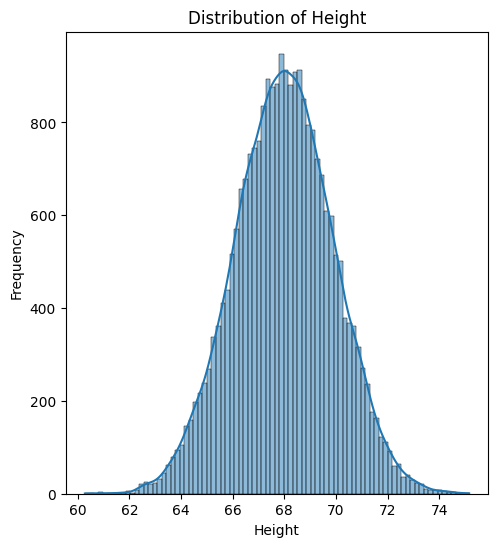

In [66]:
# Visualize the distribution of height and weight using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Height'], kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

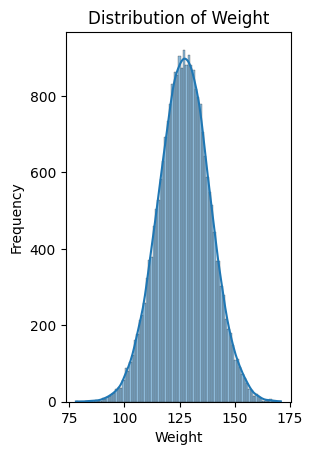

In [67]:
plt.subplot(1, 2, 2)
sns.histplot(df['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [68]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

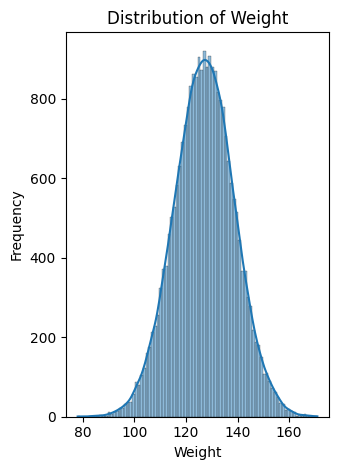

In [69]:
plt.subplot(1, 2, 2)
sns.histplot(df['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [70]:
# Split the data into training and testing sets
X = df[['Height']]

In [71]:
y = df['Weight']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Fit a linear regression model
model = LinearRegression()

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Make predictions
y_pred = model.predict(X_test)

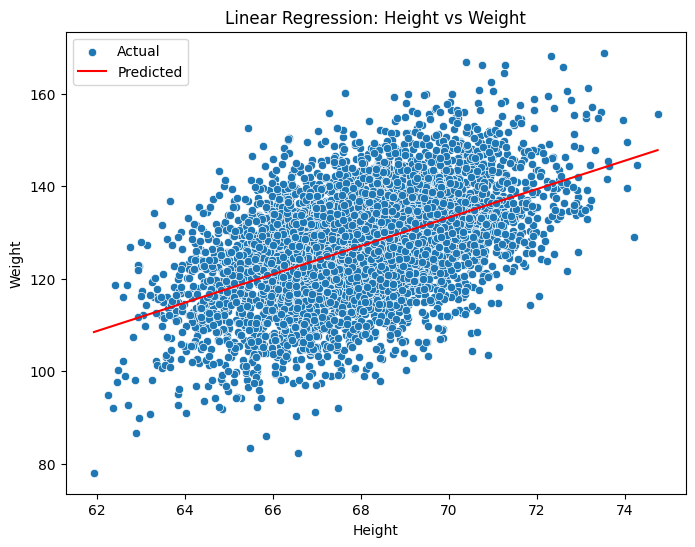

In [76]:
# Visualize the linear regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Height'], y=y_test, label='Actual')
sns.lineplot(x=X_test['Height'], y=y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [77]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [78]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 102.48791003224964
